In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from IPython.display import display, HTML
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/bundestag/whole.csv", sep=";", encoding="Latin-1")

In [3]:
df.head()

,text,datum,name,fullname,fraktion,cleaned_text,sentiment,sequence,Arbeit,Außenpolitik,...,Rente,Sicherheit,Steuern,Tierwohl,Umwelt,Verkehr,Wirtschaft,Wohnen,Zuwanderung,topic
0,Wow. Bremer AfD noch kaputter als bekannt: Tro...,2021-07-30,@DorisAchelwilm,Doris Achelwilm,Linke,Wow. Bremer AfD noch kaputter als bekannt: Tro...,-1,Wow. Bremer AfD noch kaputter als bekannt: Tro...,0.151105,0.053366,...,0.041906,0.244514,0.039496,0.019228,0.032279,0.031881,0.029670,0.043883,0.036484,Sicherheit
1,Mein Plakat ist da:\r\nAlles muss gerechter we...,2021-07-30,@DorisAchelwilm,Doris Achelwilm,Linke,Mein Plakat ist da:\r\nAlles muss gerechter we...,0,Mein Plakat ist da:\r\nAlles muss gerechter we...,0.176695,0.037150,...,0.033550,0.050284,0.112969,0.007082,0.027157,0.023583,0.031350,0.042189,0.025740,Arbeit
2,"Besuch von Bremer Aktiven der @IPPNWgermany, d...",2021-07-28,@DorisAchelwilm,Doris Achelwilm,Linke,Besuch von Bremer Aktiven der den Ärzt*innen ...,0,Besuch von Bremer Aktiven der den Ärzt*innen ...,0.190059,0.079888,...,0.021858,0.264878,0.019492,0.006364,0.129829,0.009922,0.017372,0.011602,0.005983,Sicherheit
3,"Bundesgerichtshof bestätigt, dass #CumEx krimi...",2021-07-28,@DorisAchelwilm,Doris Achelwilm,Linke,"Bundesgerichtshof bestätigt, dass CumEx krimin...",0,"Bundesgerichtshof bestätigt, dass CumEx krimin...",0.204993,0.003231,...,0.006659,0.080376,0.321194,0.002848,0.002497,0.002898,0.051125,0.003357,0.002493,Steuern
4,Queer-Austausch zum #CSD-Wochenende mit dem Ju...,2021-07-23,@DorisAchelwilm,Doris Achelwilm,Linke,Queer-Austausch zum CSD-Wochenende mit dem Jug...,0,Queer-Austausch zum CSD-Wochenende mit dem Jug...,0.114864,0.029825,...,0.027294,0.155424,0.032612,0.027148,0.034693,0.042567,0.025853,0.038699,0.059710,Sicherheit


In [4]:
df["fullname"].nunique()

350

In [5]:
df.groupby("fraktion").agg({"fullname": "nunique"})

,fullname
fraktion,
AfD,49
CDU/CSU,69
FDP,57
Grüne,51
Linke,53
SPD,67
fraktio,4


In [6]:
df.groupby(["fraktion"]).agg({"fullname": "size"})

,fullname
fraktion,
AfD,609
CDU/CSU,817
FDP,904
Grüne,708
Linke,729
SPD,715
fraktio,203


In [7]:
df.groupby(["fraktion"]).agg({"fullname": "size"}) / df.groupby(["fraktion"]).agg({"fullname": "nunique"})

,fullname
fraktion,
AfD,12.428571
CDU/CSU,11.840580
FDP,15.859649
Grüne,13.882353
Linke,13.754717
SPD,10.671642
fraktio,50.750000


In [8]:
by_fraktion = df.groupby(["fraktion"]).agg({"sentiment": [np.mean, np.size]}).reset_index()
by_fraktion.columns = by_fraktion.columns.droplevel(0)
by_fraktion.sort_values(by="mean", ascending=False)
by_fraktion.columns = ["fraktion", "mean", "size"]
by_fraktion

,fraktion,mean,size
0,AfD,-0.221675,609
1,CDU/CSU,-0.062424,817
2,FDP,-0.042035,904
3,Grüne,-0.104520,708
4,Linke,-0.148148,729
5,SPD,-0.149650,715
6,fraktio,-0.295567,203


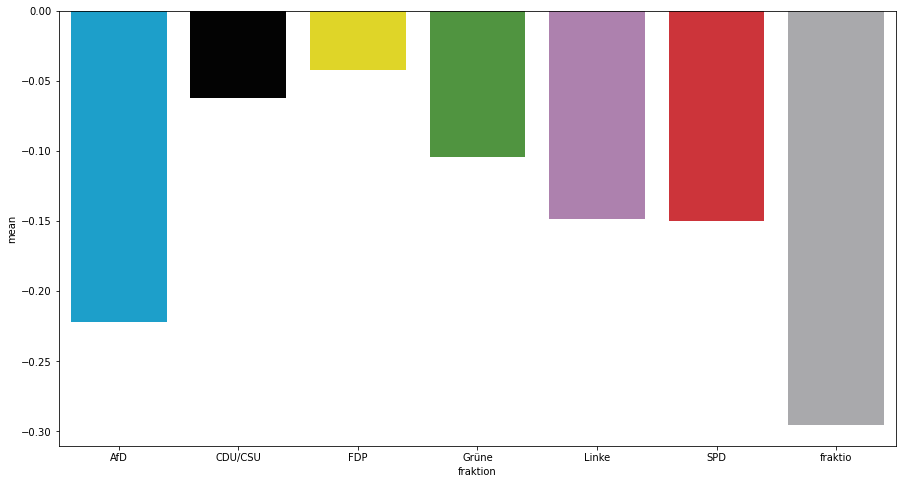

In [9]:
sns.set_palette(sns.color_palette(["#00AEE7", "#030303", "#FDF109", "#48A232", "#B47AB5", "#E61A23", "#A8A9AD"]))
plt.figure(figsize=(15,8))
sns.barplot(y="mean", x="fraktion", data=by_fraktion)

In [10]:
by_fraktion_p = df.groupby(["fraktion", "fullname"]).agg({"sentiment": [np.mean, np.size]}).reset_index()
by_fraktion_p.columns = by_fraktion_p.columns.droplevel(0)
by_fraktion_p.columns = ["fraktion", "fullname", "mean", "size"]
by_fraktion_p.sort_values(by=["mean", "size"], inplace=True)
by_fraktion_p = by_fraktion_p[by_fraktion_p["size"] > 3]
by_fraktion_p.head(10)

,fraktion,fullname,mean,size
327,SPD,Metin Hakverdi,-0.600000,5
6,AfD,Birgit Malsack-Winkemann,-0.571429,7
212,Grüne,Oliver Krischer,-0.555556,18
8,AfD,Corinna Miazga,-0.545455,11
265,Linke,Petra Pau,-0.545455,11
68,CDU/CSU,Florian Oßner,-0.500000,4
204,Grüne,Lisa Badum,-0.500000,4
329,SPD,Michael Schrodi,-0.500000,4
332,SPD,Niels Annen,-0.500000,4
262,Linke,Nicole Gohlke,-0.500000,10


In [11]:
by_fraktion_p.sort_values(by=["mean", "size"], inplace=True, ascending=False)
by_fraktion_p.head(10)

,fraktion,fullname,mean,size
175,Grüne,Agnieszka Brugger,0.500000,4
152,FDP,Marcus Faber,0.400000,5
63,CDU/CSU,Dorothee Bär,0.388889,18
121,FDP,Benjamin Strasser,0.333333,9
293,SPD,Detlef Müller,0.300000,10
62,CDU/CSU,Daniela Ludwig,0.272727,11
178,Grüne,Beate Müller-Gemmeke,0.250000,8
55,CDU/CSU,Antje Tillmann,0.250000,4
64,CDU/CSU,Elisabeth Motschmann,0.250000,4
110,CDU/CSU,Thomas Heilmann,0.250000,4


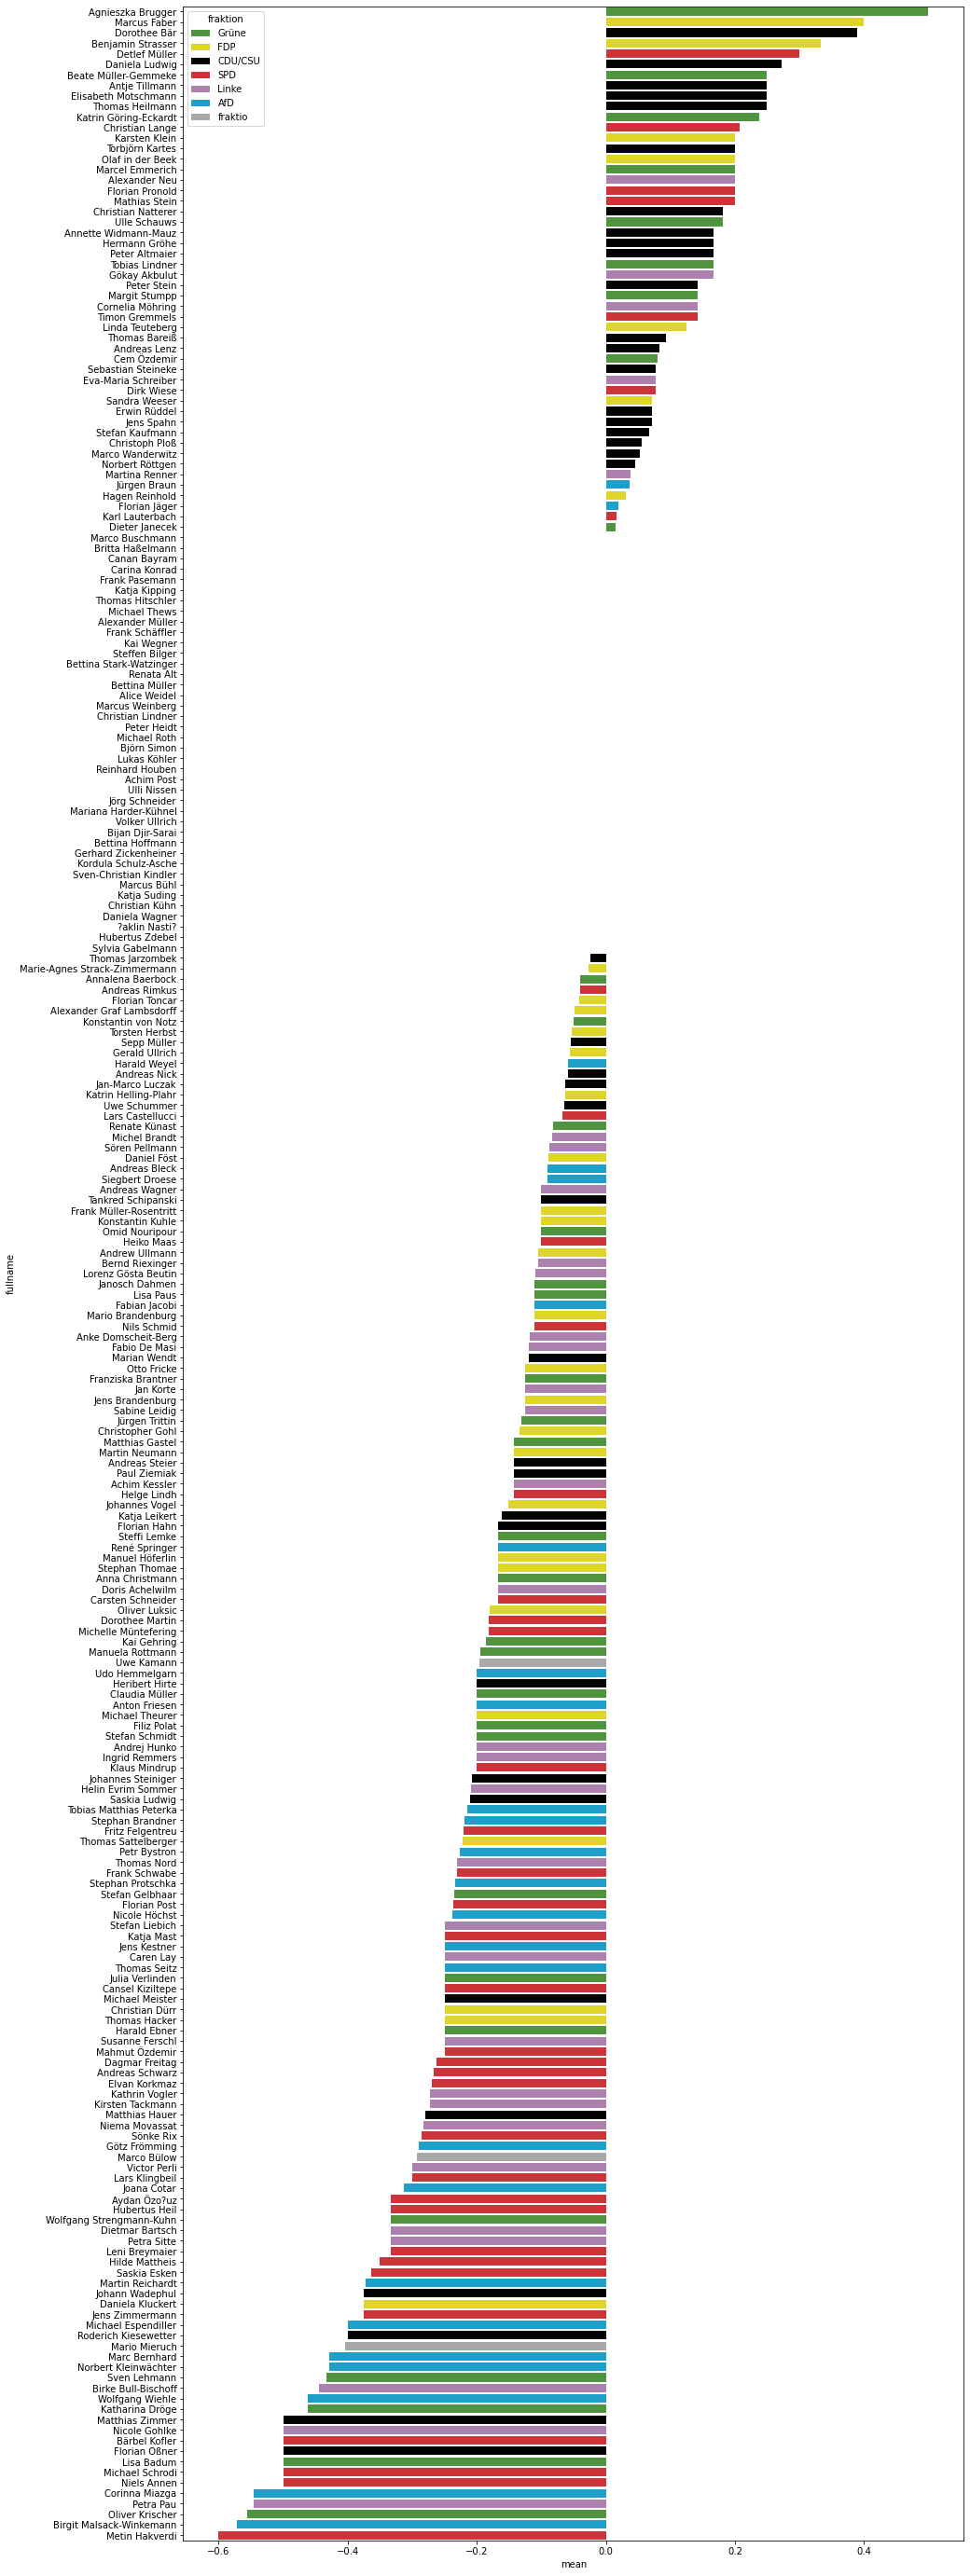

In [12]:
plt.figure(figsize=(15,50))
sns.set_palette(sns.color_palette(["#48A232", "#FDF109", "#030303", "#E61A23","#B47AB5", "#00AEE7", "#A8A9AD"]))
sns.barplot(x="mean", y="fullname", data=by_fraktion_p, hue="fraktion", dodge=False)


In [13]:
display(HTML(df[["text", "topic"]].head(20).to_html()))

,text,topic
0,"Wow. Bremer AfD noch kaputter als bekannt: Trotz Hilfe aus Berlin nicht in der Lage, eine rechtssichere Liste aufzustellen und deshalb wohl auch nicht auf dem Stimmzettel zur #BTW2021. ?? \r\n\r\nhttps://t.co/xNA9YYh0sY https://t.co/DDi192C3PW",Sicherheit
1,Mein Plakat ist da:\r\nAlles muss gerechter werden!\r\n\r\n#BTW2021 #btw21 \r\n#Bremen #Bremerhaven https://t.co/ZGygyEavum,Arbeit
2,"Besuch von Bremer Aktiven der @IPPNWgermany, den Ärzt*innen für die Verhütung des Atomkriegs. ??\r\nEine #atomwaffenfrei|e Welt ist nötig. Dass das Verteidigungsministerium weiter Kampfflugzeuge für #nukleareTeilhabe anschafft, ist absurd falsche Politik. Wir wollen sie ändern. https://t.co/3TjILKcNBc",Sicherheit
3,"Bundesgerichtshof bestätigt, dass #CumEx kriminelle Steuerhinterziehung war + ist. Verfahren betrifft auch Privatbank Warburg, mit der sich Olaf Scholz traf. Jetzt: Damals erzielte Gewinne restlos einziehen, Finanz-Filz aufklären!\r\n\r\nhttps://t.co/OtztUH22wn https://t.co/OtztUH22wn",Steuern
4,"Queer-Austausch zum #CSD-Wochenende mit dem Jugendnetzwerk #Lambda Mitteldeutschland. Fragen, die voll ins Herz gehen: Warum werden Probleme erst dann ernst genommen, wenn andere als die Betroffenen darüber reden? Allerdings. Auf einen durchdringenden #DykeMarch + #CSDBerlin! ?? https://t.co/Xarv4lMRLe",Sicherheit
5,"In Gedenken an die neonazistischen Terrorakte von #Utøya und #Oslo vor 10 Jahren und am Einkaufszentrum #OEZ in #München vor 5 Jahren. Was für furchtbare Tage das waren und bleiben. Wir erinnern der Opfer und dürfen nie aufhören, rechter Gewalt und Rassismus entgegenzutreten.",Arbeit
6,"Die verheerenden #Brände in der #Türkei machen mich sehr traurig und betroffen. Sie wecken Erinnerungen an die tödlichen Brände 2018 in Griechenland. Mein Mitgefühl gilt den vielen Opfern und Hinterbliebenen, die so viel verloren haben. https://t.co/rexzFjFZvd",Familie
7,Verfolgen Sie jetzt live die Diskussion unter: https://t.co/clYpgusHpN https://t.co/USJiilsbPi,Arbeit
8,In meinem Positionspapier für eine #Partizipationsgesetz (https://t.co/r9ZZEqLh6u ) steht drin was @dieLinke tut um Vielfalt in unserer Gesellschaft zu stärken und Teilhabe zu garantieren.\r\n\r\nMehr zur Antidiskriminierungspolitik im August bei dieser Diskussion ???? https://t.co/9PqnKSFq1q,Arbeit
9,Ich freue mich auf die Veranstaltung mit meiner Genossin @PetraPauMaHe nächste Woche. #linksBWegt https://t.co/Cg3qmnNMPt,Arbeit


In [14]:
result = df.pivot_table(index=["fraktion"], columns='topic', aggfunc='size', fill_value=0)
result

topic,Arbeit,Außenpolitik,Digitalisierung,Europäische Union,Familie,Finanzen,Gesundheit,Integration,Klima,Pflege,Rente,Sicherheit,Steuern,Tierwohl,Umwelt,Verkehr,Wirtschaft,Wohnen,Zuwanderung
fraktion,,,,,,,,,,,,,,,,,,,
AfD,267,16,8,14,12,11,57,17,13,21,16,81,7,4,20,7,5,10,23
CDU/CSU,344,14,26,15,17,11,63,49,16,37,16,112,10,7,18,19,7,25,11
FDP,413,18,26,26,16,38,67,28,25,38,13,91,12,0,15,28,19,24,7
Grüne,250,13,14,13,19,17,40,21,94,27,9,90,9,2,45,24,1,16,4
Linke,288,15,10,20,17,39,54,23,55,14,14,84,9,4,28,8,7,31,9
SPD,315,15,13,4,20,9,66,31,26,34,15,99,7,1,24,7,3,13,13
fraktio,107,2,3,7,2,1,17,7,7,5,4,16,2,1,10,1,5,5,1


In [15]:
relative = result.apply(lambda x: x / result.sum(axis=1))
relative_by_topic = relative / relative.mean()
relative_by_topic.reset_index(inplace=True)
relative_by_topic

topic,fraktion,Arbeit,Außenpolitik,Digitalisierung,Europäische Union,Familie,Finanzen,Gesundheit,Integration,Klima,Pflege,Rente,Sicherheit,Steuern,Tierwohl,Umwelt,Verkehr,Wirtschaft,Wohnen,Zuwanderung
0,AfD,1.012139,1.381844,0.656005,1.031648,0.943496,0.749991,1.188101,0.757626,0.429821,0.960413,1.384468,1.121215,0.984718,1.544272,0.897074,0.642075,0.740258,0.633278,2.641633
1,CDU/CSU,0.972037,0.901285,1.589227,0.823929,0.996330,0.559051,0.978845,1.627785,0.394329,1.261350,1.031996,1.155626,1.048598,2.014453,0.601819,1.299082,0.772514,1.180130,0.941743
2,FDP,1.054698,1.047274,1.436282,1.290701,0.847477,1.745403,0.940810,0.840645,0.556843,1.170768,0.757801,0.848583,1.137218,0.000000,0.453250,1.730194,1.895028,1.023893,0.541616
3,Grüne,0.815179,0.965754,0.987483,0.824007,1.284981,0.997002,0.717170,0.805024,2.673349,1.062151,0.669868,1.071595,1.089031,0.664168,1.736180,1.893578,0.127350,0.871562,0.395174
4,Linke,0.912035,1.082231,0.685026,1.231185,1.116600,2.221353,0.940290,0.856295,1.519135,0.534880,1.012000,0.971344,1.057660,1.290071,1.049170,0.613010,0.865767,1.640008,0.863529
5,SPD,1.017070,1.103421,0.907971,0.251058,1.339369,0.522657,1.171746,1.176735,0.732198,1.324429,1.105517,1.167214,0.838732,0.328833,0.916897,0.546886,0.378308,0.701212,1.271743
6,fraktio,1.216842,0.518191,0.738006,1.547472,0.471748,0.204543,1.063037,0.935890,0.694325,0.686009,1.038351,0.664424,0.844044,1.158204,1.345610,0.275175,2.220775,0.949917,0.344561


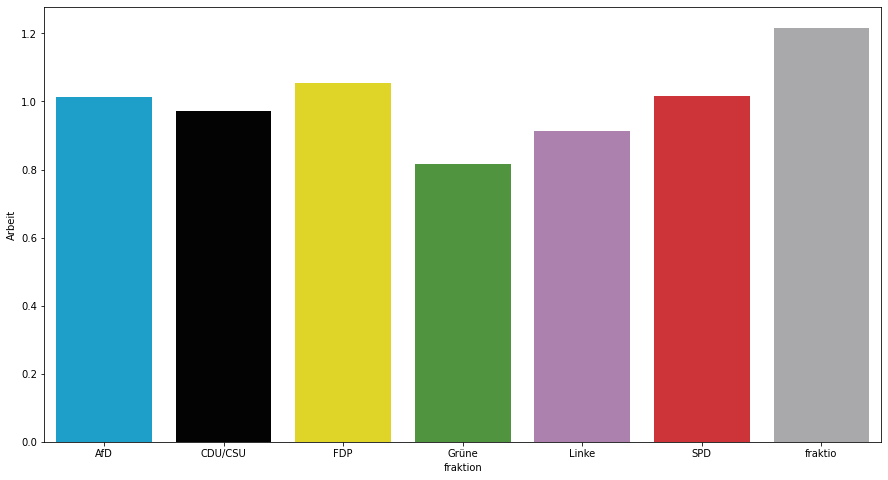

In [16]:
plt.figure(figsize=(15,8))
sns.set_palette(sns.color_palette(["#00AEE7", "#030303", "#FDF109", "#48A232", "#B47AB5", "#E61A23", "#A8A9AD"]))
sns.barplot(y="Arbeit", x="fraktion", data=relative_by_topic)

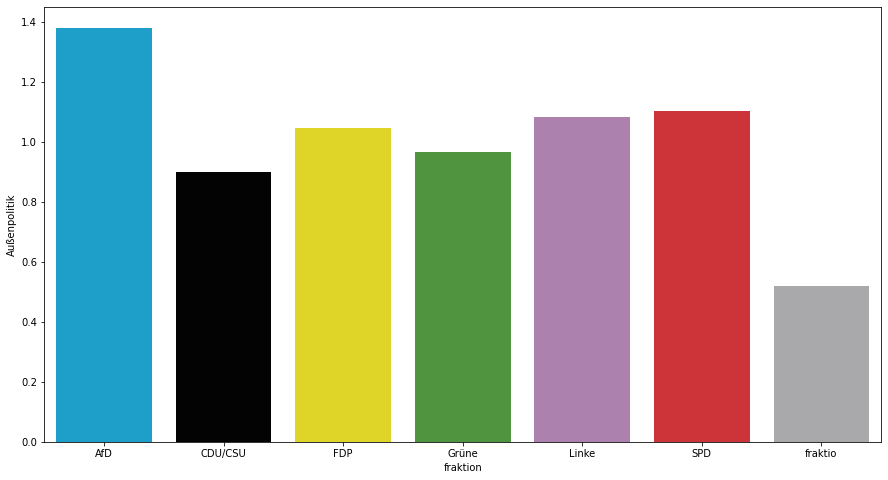

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(y="Außenpolitik", x="fraktion", data=relative_by_topic)

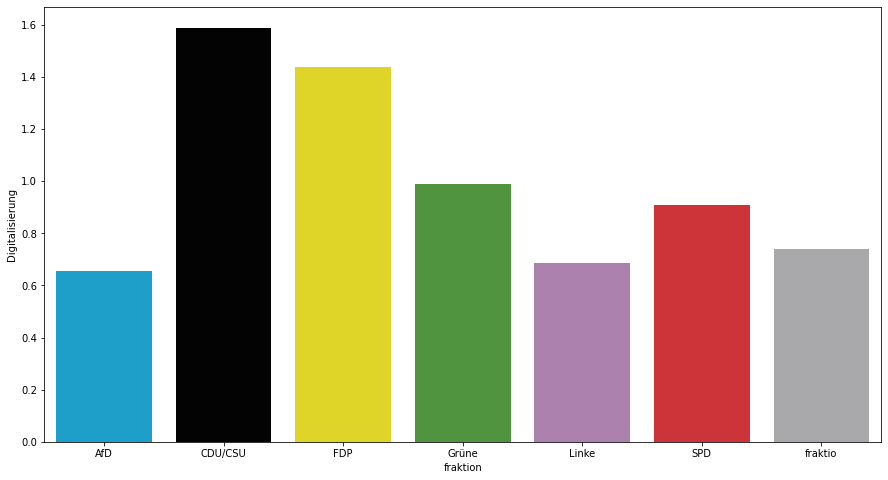

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(y="Digitalisierung", x="fraktion", data=relative_by_topic)

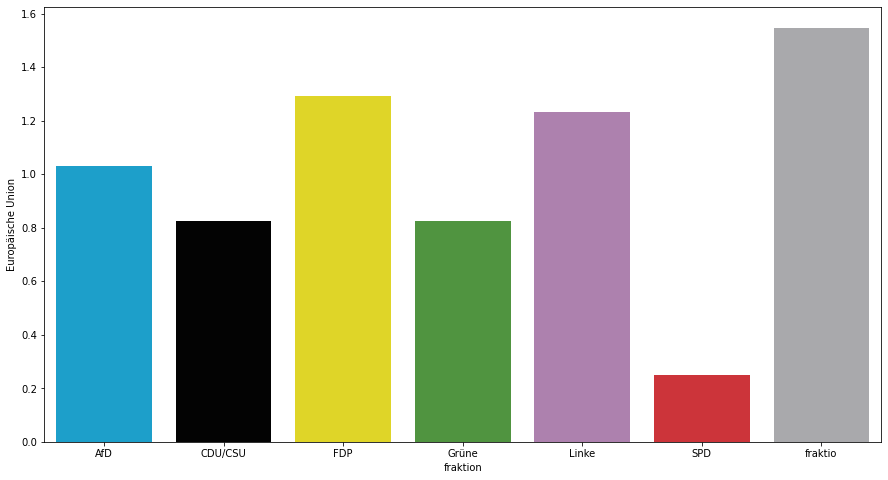

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(y="Europäische Union", x="fraktion", data=relative_by_topic)

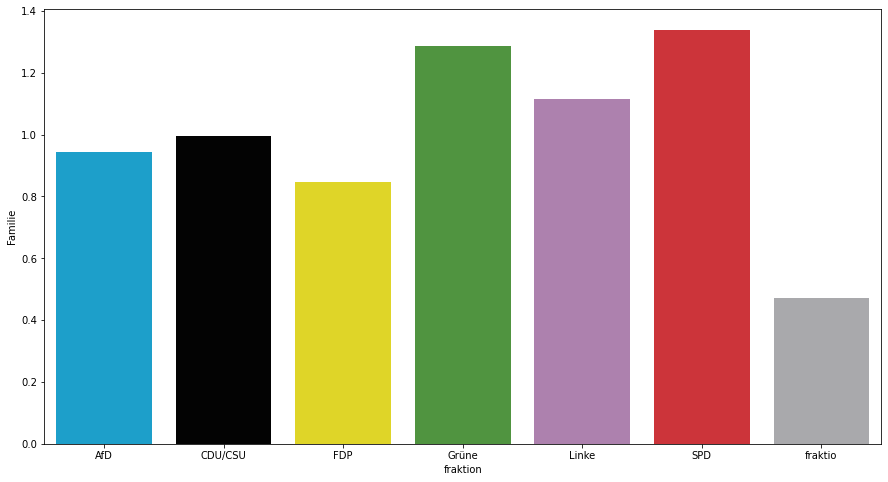

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(y="Familie", x="fraktion", data=relative_by_topic)

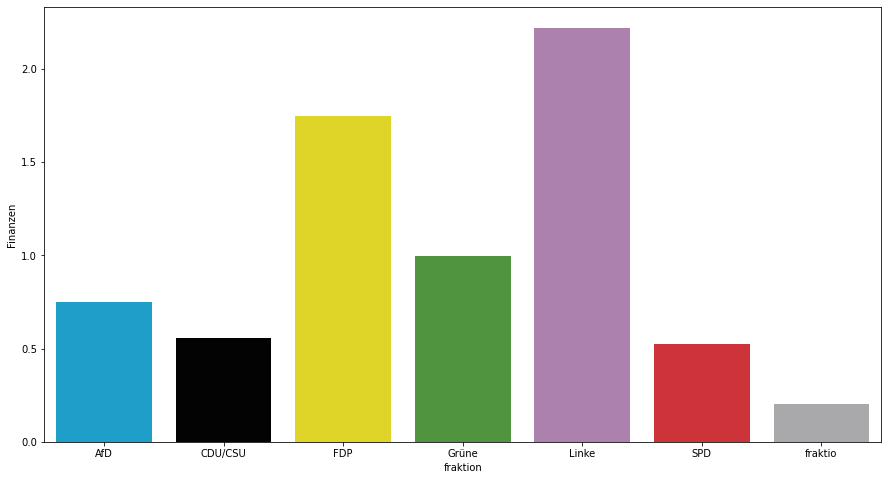

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(y="Finanzen", x="fraktion", data=relative_by_topic)

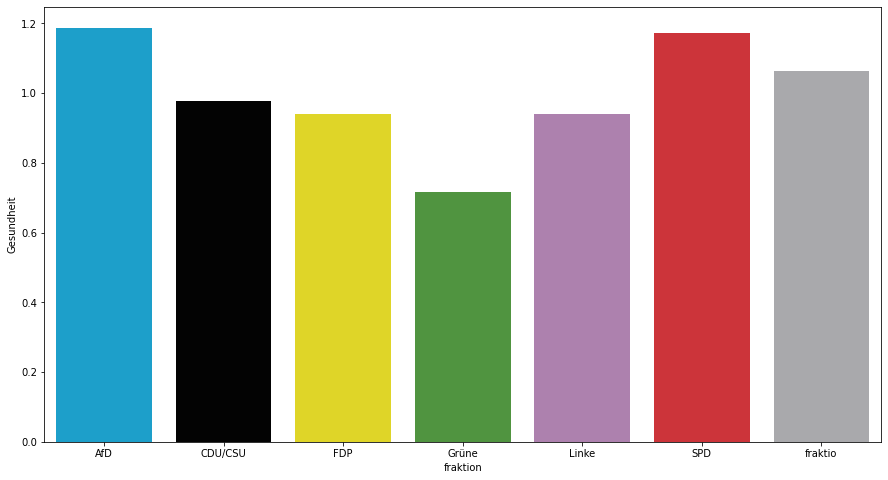

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(y="Gesundheit", x="fraktion", data=relative_by_topic)

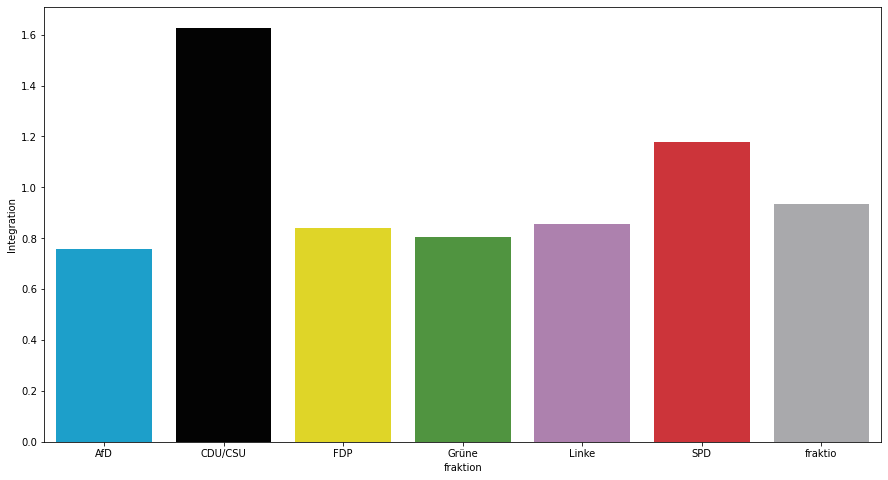

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(y="Integration", x="fraktion", data=relative_by_topic)

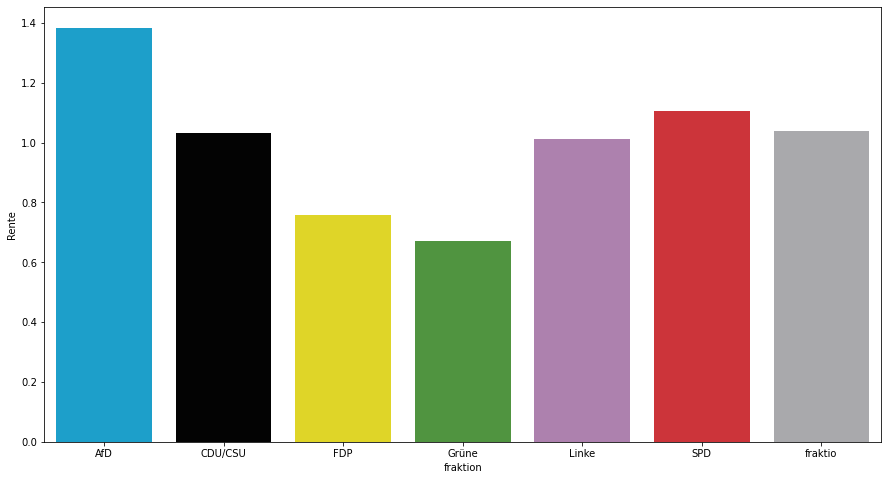

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(y="Rente", x="fraktion", data=relative_by_topic)

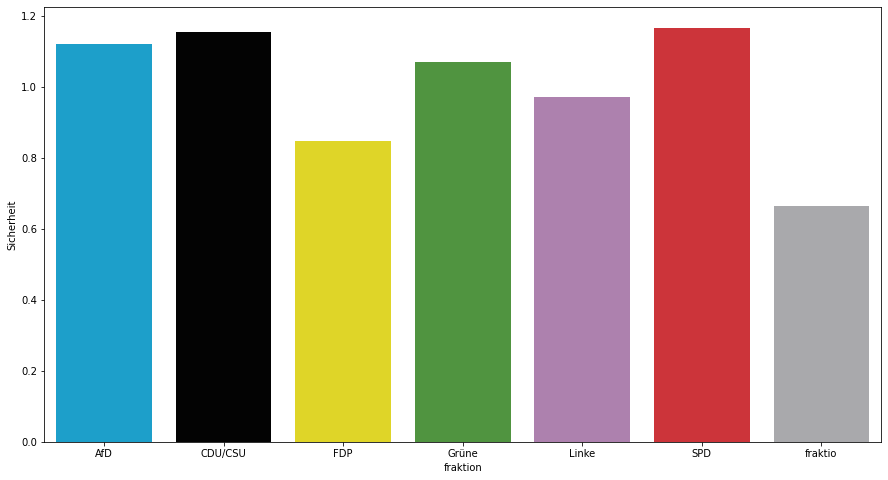

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(y="Sicherheit", x="fraktion", data=relative_by_topic)

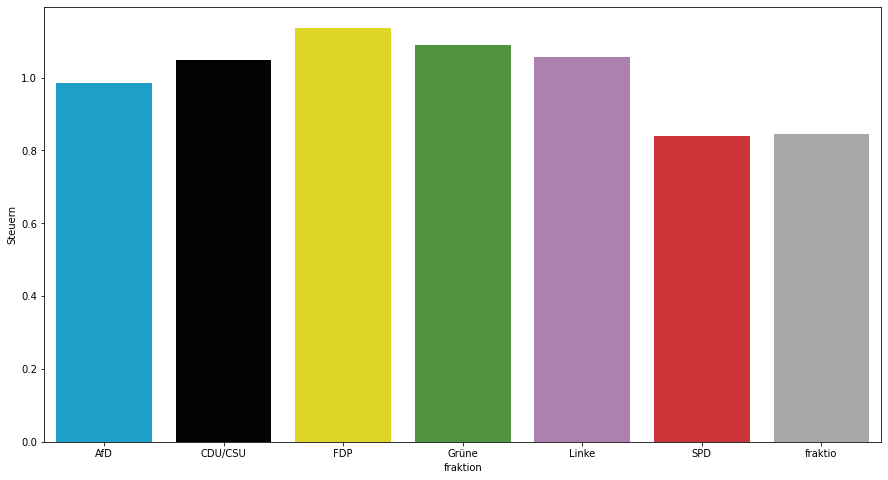

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(y="Steuern", x="fraktion", data=relative_by_topic)

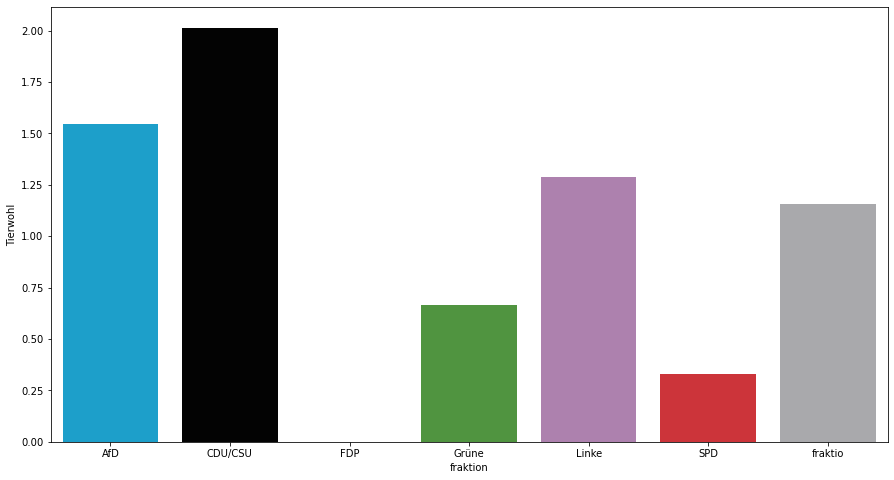

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(y="Tierwohl", x="fraktion", data=relative_by_topic)

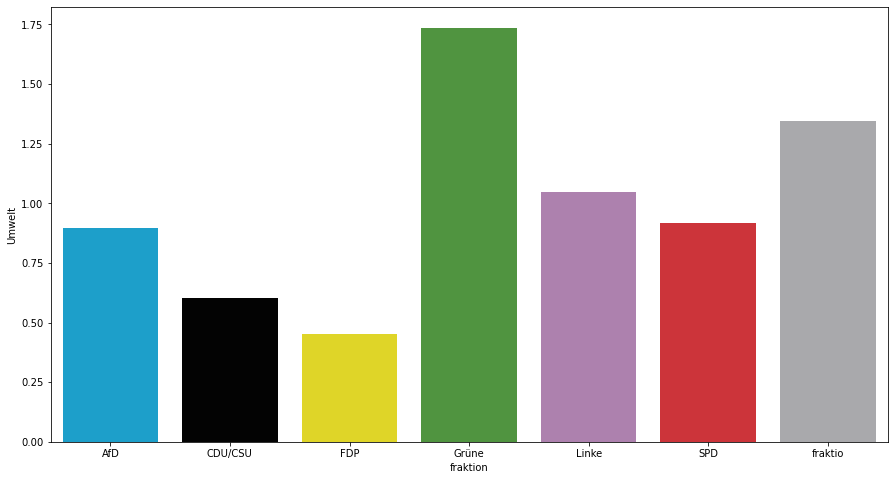

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(y="Umwelt", x="fraktion", data=relative_by_topic)

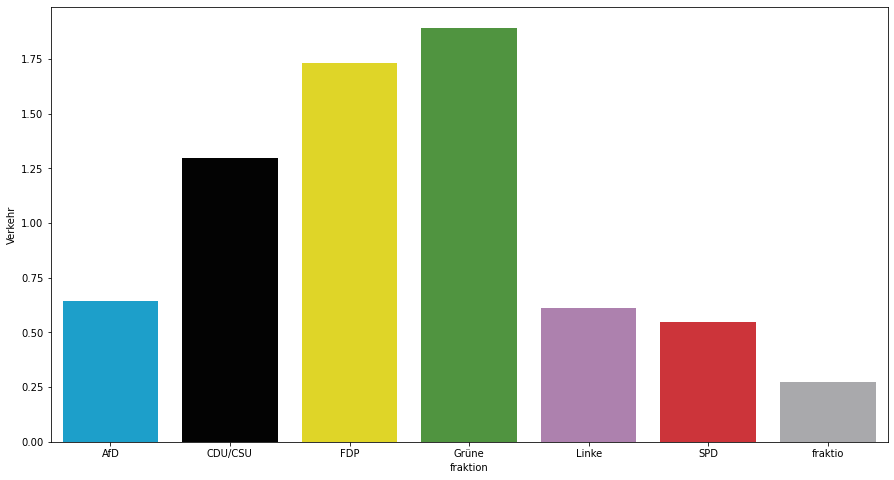

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(y="Verkehr", x="fraktion", data=relative_by_topic)

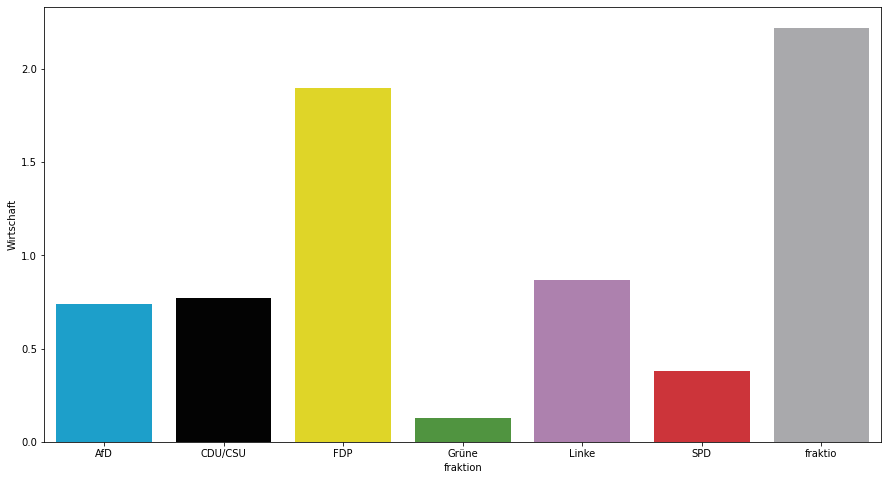

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(y="Wirtschaft", x="fraktion", data=relative_by_topic)

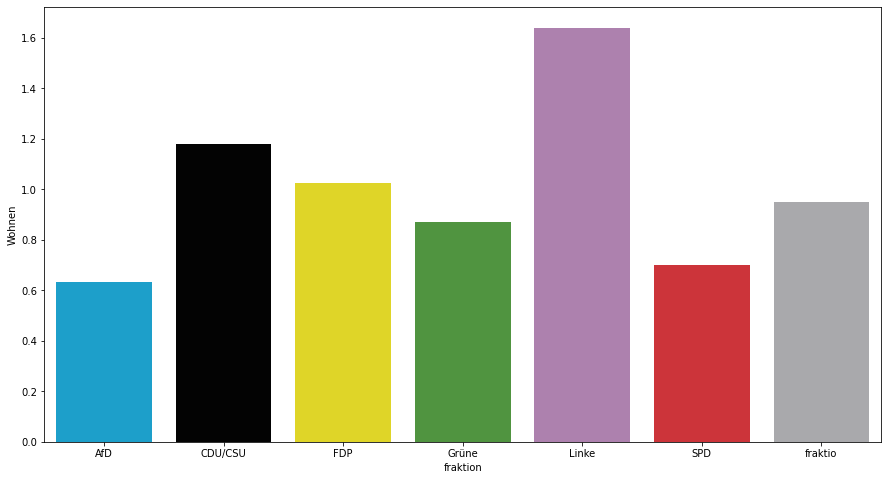

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(y="Wohnen", x="fraktion", data=relative_by_topic)

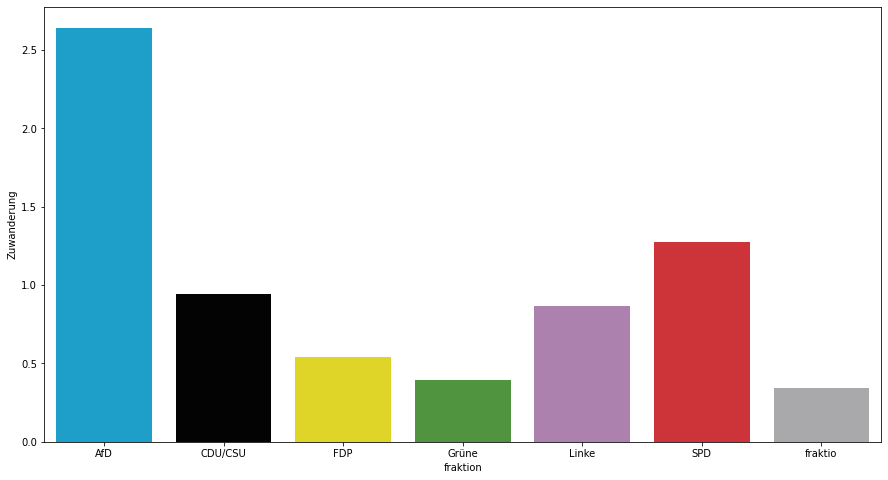

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(y="Zuwanderung", x="fraktion", data=relative_by_topic)

In [ ]:
df.columns

In [33]:
by_topic = df.groupby(["topic"]).agg({"sentiment": [np.mean, np.size]}).reset_index()
by_topic.columns = by_topic.columns.droplevel(0)
by_topic.columns = ["topic", "mean", "size"]
by_topic.sort_values(by="mean", ascending=False)

,topic,mean,size
9,Pflege,0.261364,176
13,Tierwohl,0.105263,19
17,Wohnen,0.040323,124
16,Wirtschaft,-0.021277,47
6,Gesundheit,-0.024725,364
4,Familie,-0.038835,103
7,Integration,-0.056818,176
11,Sicherheit,-0.115183,573
18,Zuwanderung,-0.117647,68
8,Klima,-0.122881,236


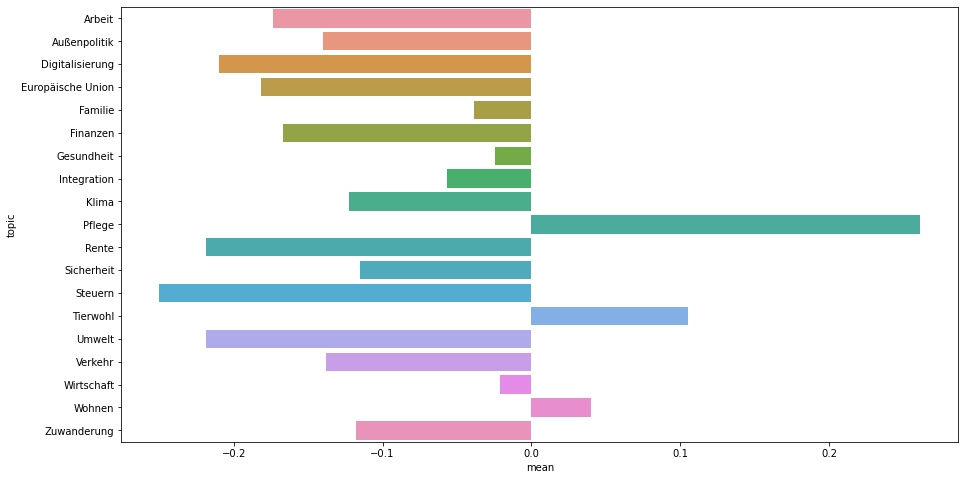

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(y="topic", x="mean", data=by_topic)

In [35]:
by_topic_f = df.groupby(["fraktion", "topic"]).agg({"sentiment": [np.mean, np.size]}).reset_index()
by_topic_f.columns = by_topic_f.columns.droplevel(0)
by_topic_f.columns = ["fraktion", "topic", "mean", "size"]
by_topic_f.sort_values(by="mean", ascending=False)

,fraktion,topic,mean,size
69,Grüne,Tierwohl,0.500000,2
65,Grüne,Pflege,0.481481,27
47,FDP,Pflege,0.473684,38
130,fraktio,Wohnen,0.400000,5
88,Linke,Tierwohl,0.250000,4
...,...,...,...,...
127,fraktio,Umwelt,-0.600000,10
116,fraktio,Europäische Union,-0.714286,7
123,fraktio,Rente,-0.750000,4
118,fraktio,Finanzen,-1.000000,1


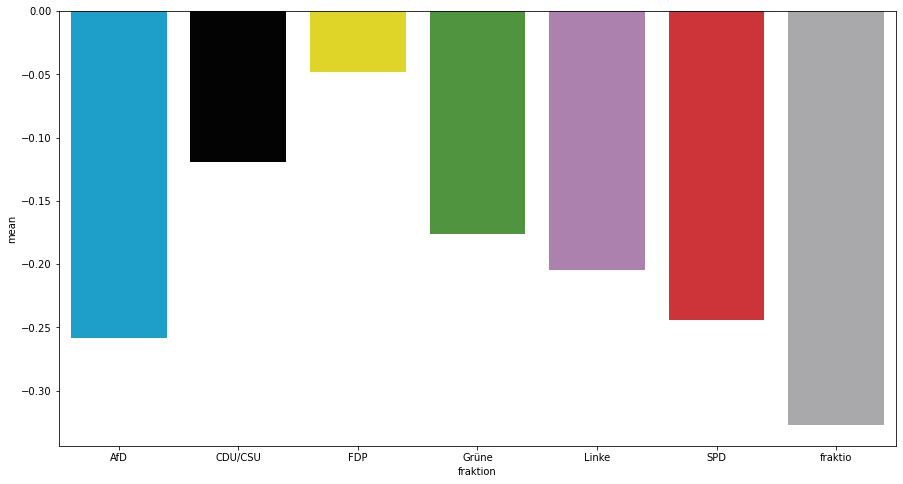

In [36]:
def visualize_topic(topic):
    subset = by_topic_f[by_topic_f["topic"] == topic]
    plt.figure(figsize=(15,8))
    sns.barplot(y="mean", x="fraktion", data=subset)
    

visualize_topic("Arbeit")

In [ ]:
df.columns

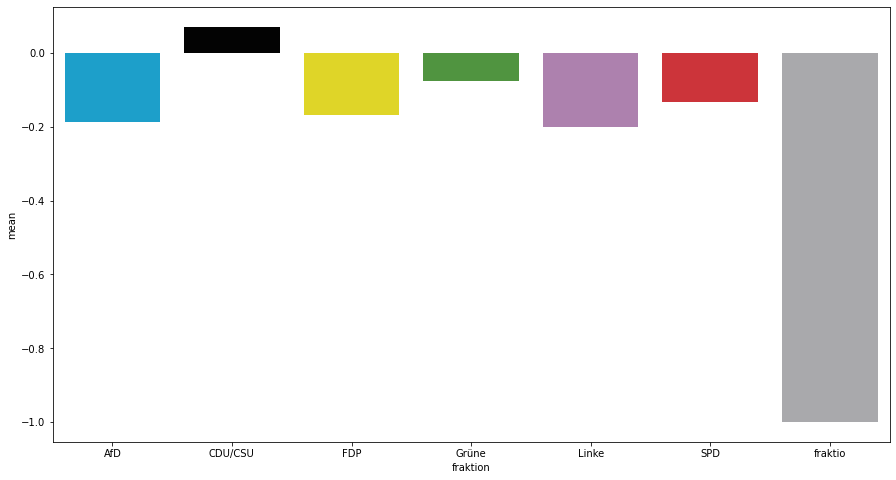

In [37]:
visualize_topic("Außenpolitik")

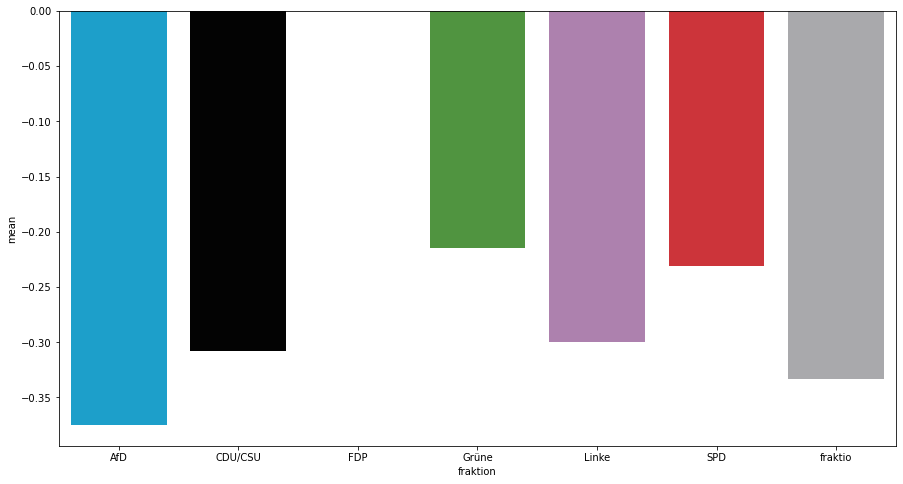

In [38]:
visualize_topic("Digitalisierung")

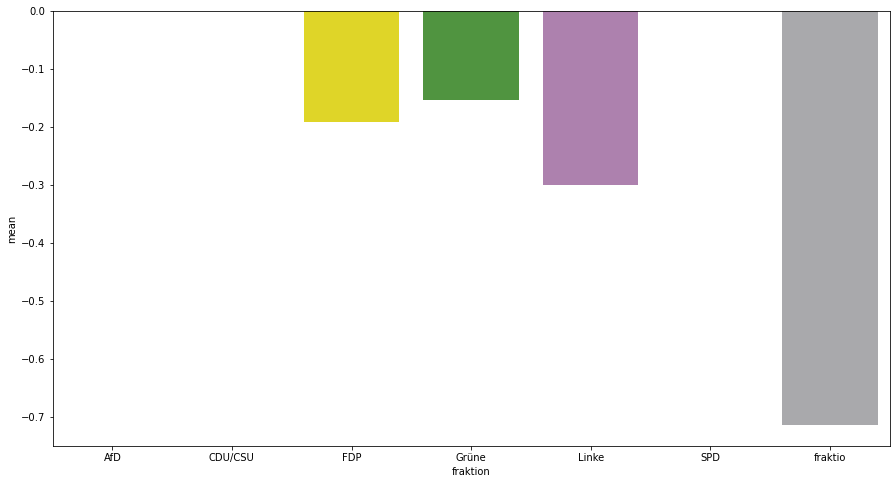

In [39]:
visualize_topic("Europäische Union")

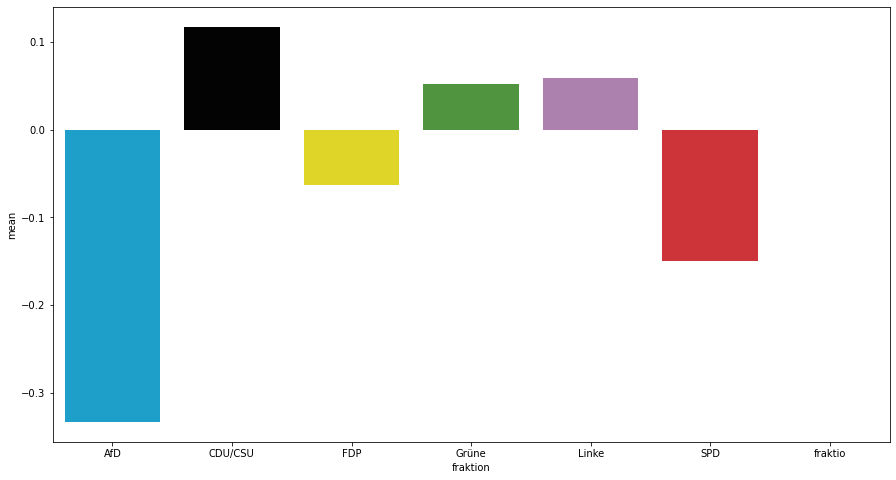

In [40]:
visualize_topic("Familie")

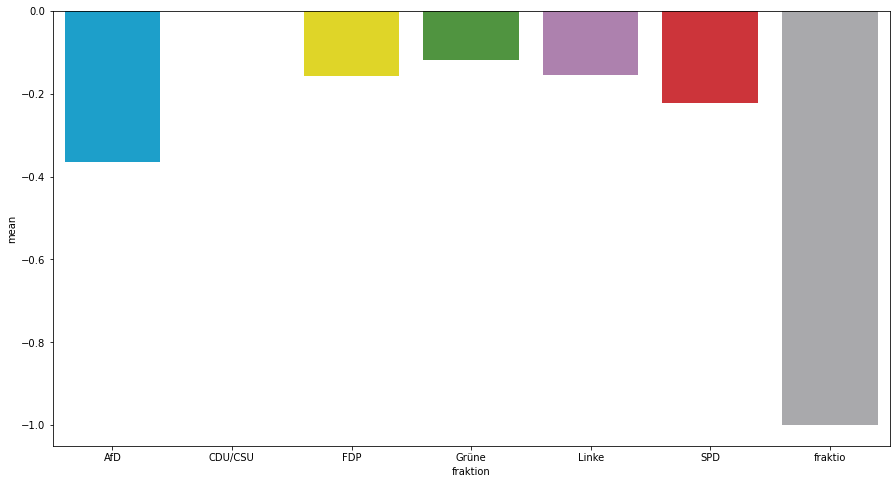

In [41]:
visualize_topic("Finanzen")

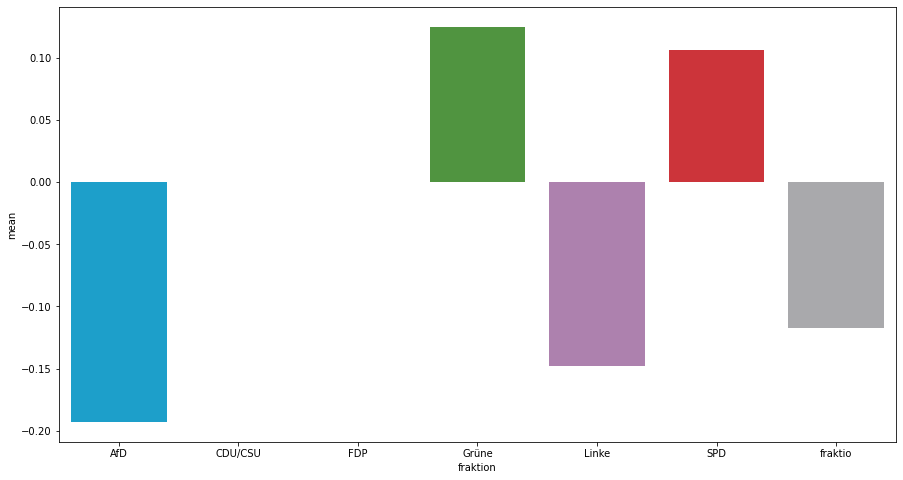

In [42]:
visualize_topic("Gesundheit")

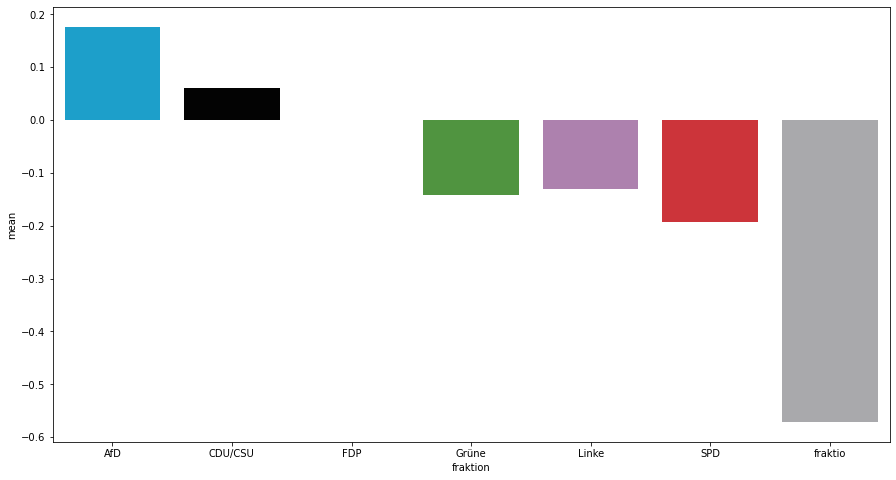

In [43]:
visualize_topic("Integration")

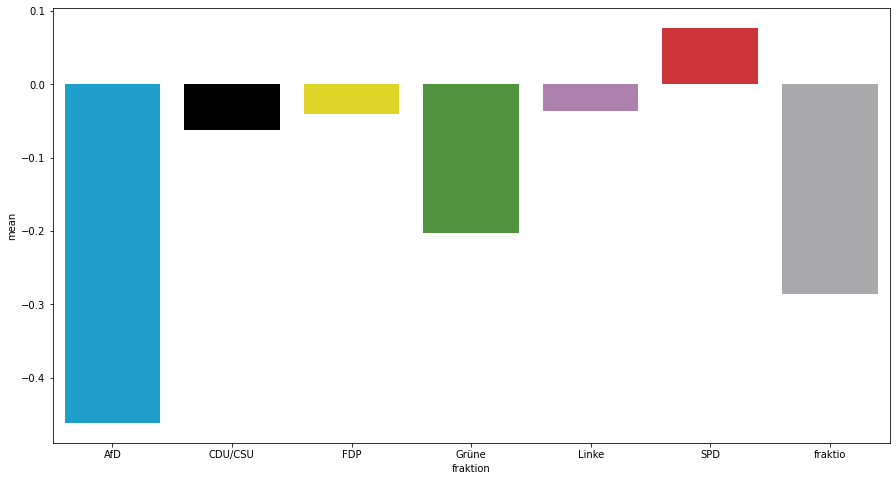

In [44]:
visualize_topic("Klima")

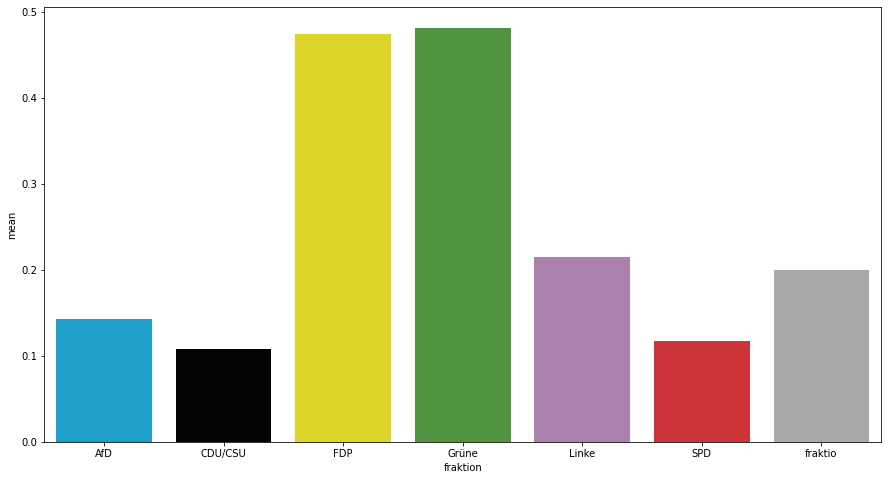

In [45]:
visualize_topic("Pflege")

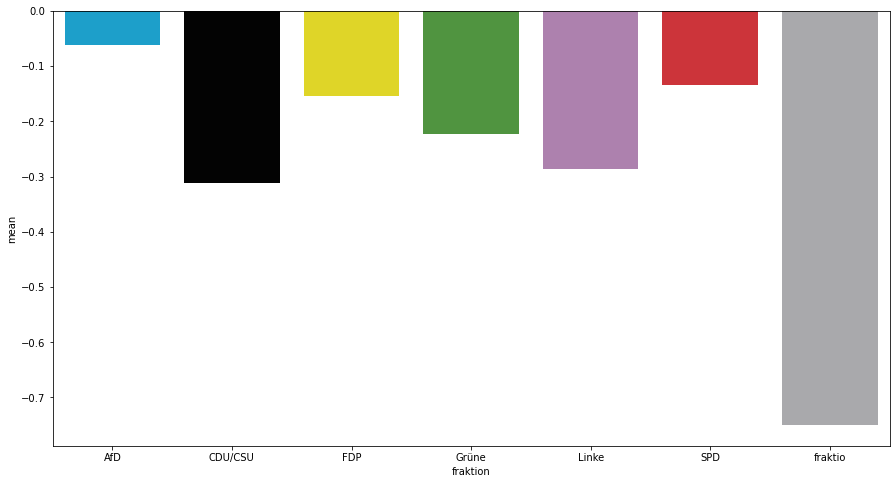

In [46]:
visualize_topic("Rente")

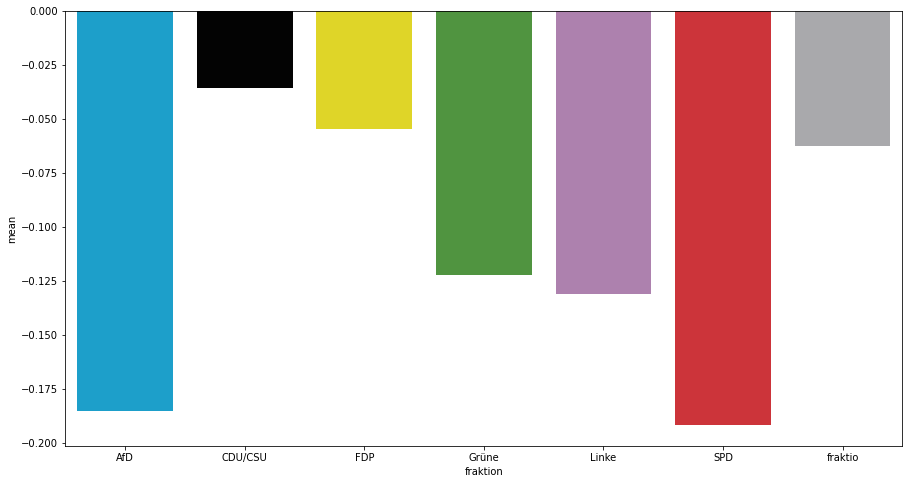

In [47]:
visualize_topic("Sicherheit")

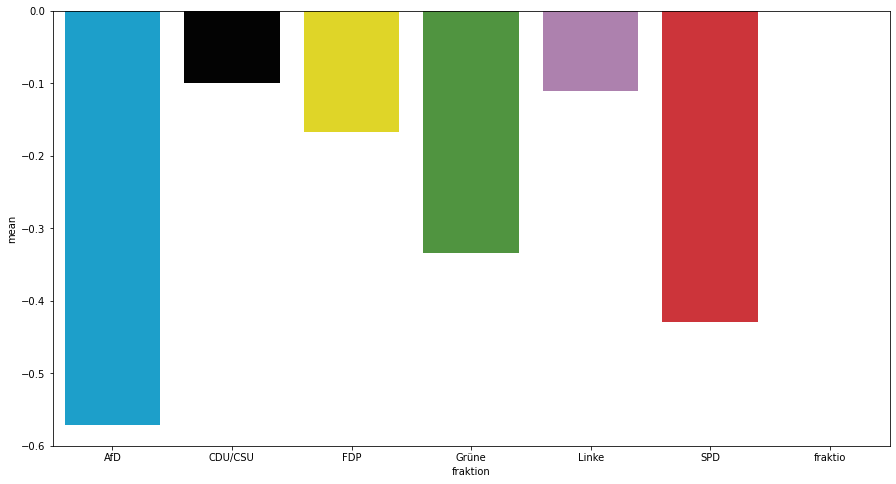

In [48]:
visualize_topic("Steuern")

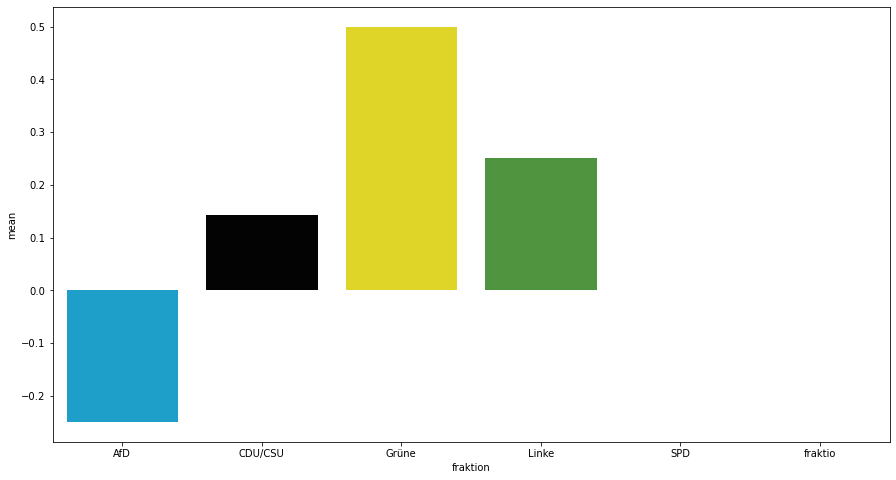

In [49]:
visualize_topic("Tierwohl")

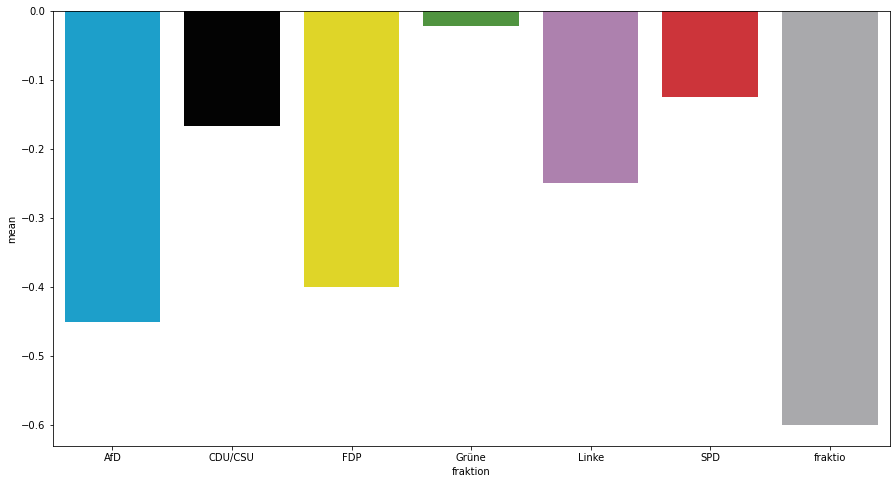

In [50]:
visualize_topic("Umwelt")

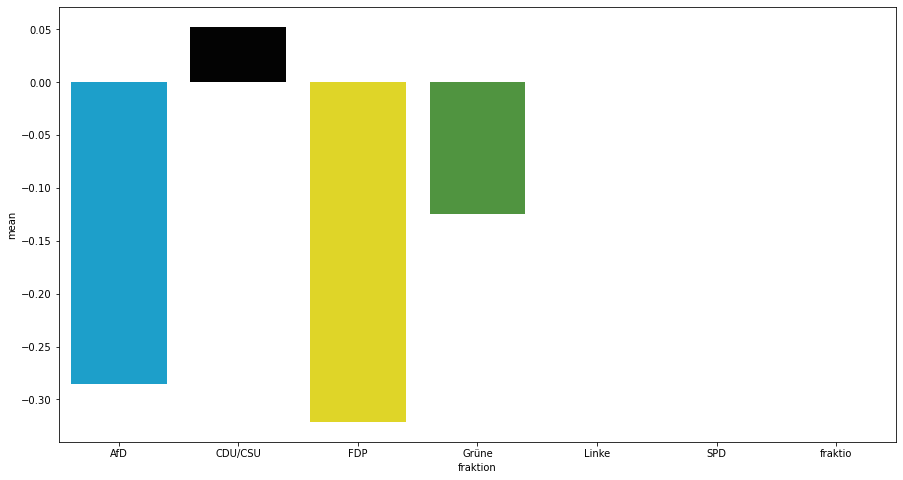

In [51]:
visualize_topic("Verkehr")

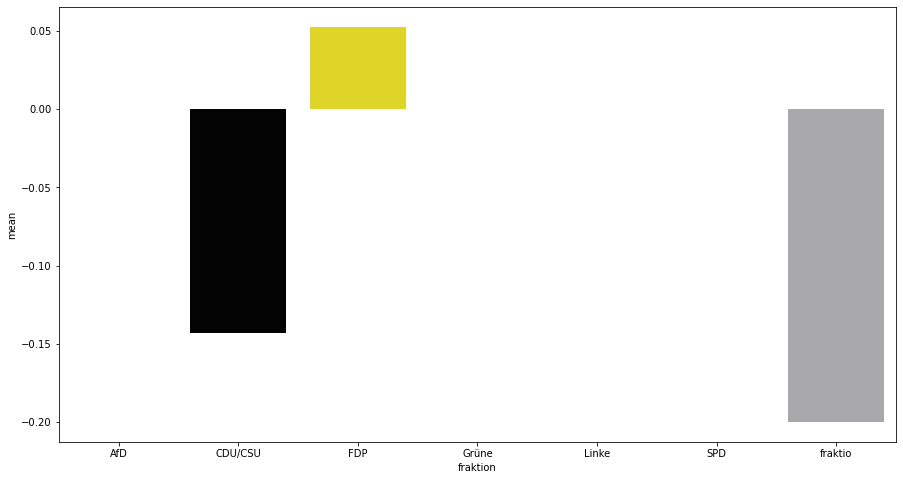

In [52]:
visualize_topic("Wirtschaft")

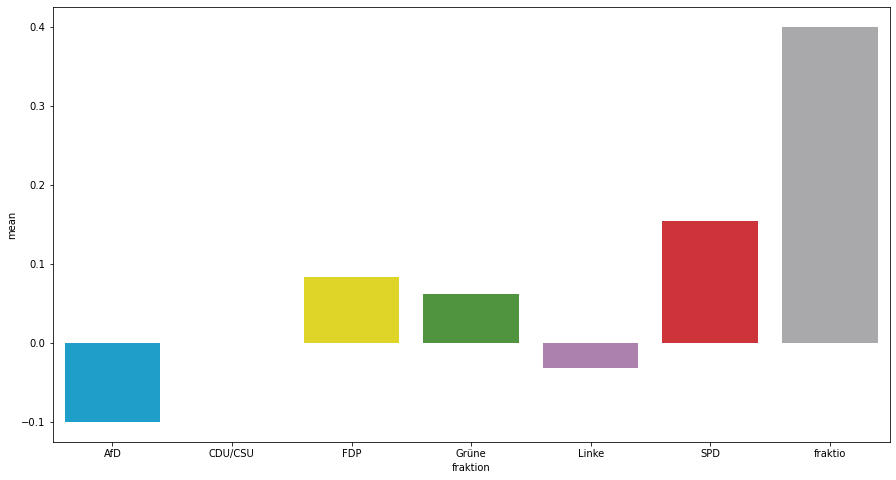

In [53]:
visualize_topic("Wohnen")

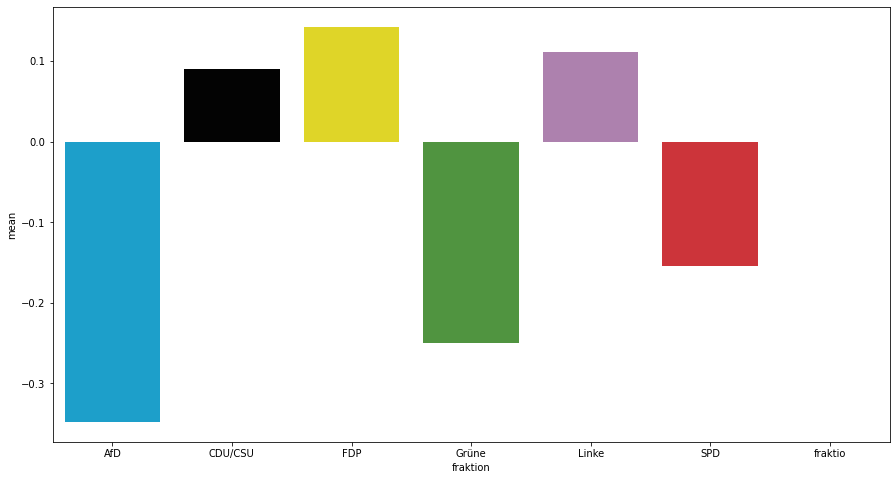

In [54]:
visualize_topic("Zuwanderung")